# Find the maximum of number of connected colors
## Introduction
In this notebook I am solving a following problem: given a grid of tiles colored in three colors, find the maximum number of connected tiles of matching color.
<img src="5x5.png" style="height:150px"> <img src="5x5_a.png" style="height:150px">

## Solving using Python
### Image generation
First let's write a little code to initialize a random example.

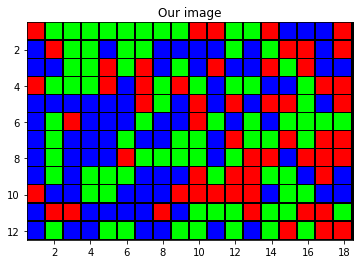

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections

image_size = 1000
image = np.zeros((image_size,image_size,3), 'uint8')

tiles_x = 18 # number of tiles along x
tiles_y = 12 # number tiles along y
num_of_colors = 3 # number of different colors (up to three)
ppt_x = image_size//tiles_x # pixels per tile along x
ppt_y = image_size//tiles_y # pixels per tile along y
color_matrix = np.random.randint(num_of_colors, 
                         size = (tiles_y,tiles_x)) # [0,1,2] are [r,g,b]

for i in range(tiles_x): # create a picture
    for j in range(tiles_y):
        # tiles
        image[(j*ppt_y):(j*ppt_y+ppt_y),
              (i*ppt_x):(i*ppt_x+ppt_x),
              color_matrix[j,i]] = 255
        # borders
        image[:,(i*ppt_x-3):(i*ppt_x+3),:]=0
        image[(j*ppt_y-3):(j*ppt_y+3),:,:]=0
        
plt.imshow(image, extent=(0.5, tiles_x + .5 , tiles_y + .5, 0.5, ))
plt.title('Our image')
plt.show()

## Using graph traversal
Let us consider the color matrix of our image, i.e. a matrix where the tiles of different colors are representesd as integers: $0,1,2$ for red, green and blue correspondingly. For now I will use the color matrix that was created during the image generation, but hopefully some time later I will write code for breaking images down into tiles and building color matrices based on it. Here is how the color matrix for the example above looks like.

In [33]:
print(color_matrix)

[[0 1 1 1 1 1 1 1 1 0 0 1 1 0 2 2 2 0]
 [2 0 1 1 2 1 1 2 2 2 2 1 2 1 0 0 2 0]
 [2 2 1 1 0 1 0 2 1 2 0 2 2 0 1 0 2 2]
 [0 1 1 1 0 2 0 1 0 1 2 1 1 2 2 1 0 0]
 [2 2 2 2 2 2 0 1 2 0 2 0 2 0 0 1 2 0]
 [2 1 0 2 2 2 1 2 2 0 1 2 1 2 1 1 1 1]
 [2 1 2 2 2 1 2 2 1 1 2 0 1 1 0 1 0 0]
 [2 1 2 2 2 0 1 1 1 1 2 1 0 0 2 0 0 0]
 [2 1 2 1 1 1 2 2 2 0 1 0 0 1 1 2 0 2]
 [0 2 2 1 1 2 2 2 0 0 0 0 0 2 1 1 2 2]
 [2 0 0 2 2 2 2 0 2 1 1 1 0 1 1 0 0 1]
 [2 1 2 2 1 1 2 2 1 1 2 1 2 1 0 1 0 0]]


To solve this problem we start at some tile and look for matching integers (i.e. color) in the neighboring matrix elements, we then jump to each one of those tiles and repeat the process until we walk through the whole chain. Each same-colored chain of tiles is a graph, and a process of walking through every node of a graph is called graph traversal. While traversing a graph we find its length, doing that for each chain will help us find the longest one.

In [34]:
def checkNeighbours(matrix,i,j): # Check the neighbouring  matrix elements, return whether they are 
    ans = {0:(False,(0,0)),      # match/no-match and the corresponding point's coordinates
           1:(False,(0,0)), 
           2:(False,(0,0)), 
           3:(False,(0,0))} 
    if (matrix[i,j+1] == matrix[i,j]): # look right
        ans[0] = True, (i,(j+1))
    if (matrix[i+1,j] == matrix[i,j]): # look down
        ans[1] = True, ((i+1),j)
    if (matrix[i,j-1] == matrix[i,j]): # look down
        ans[2] = True, (i,(j-1))
    if (matrix[i-1,j] == matrix[i,j]): # look left
        ans[3] = True, ((i-1),j)
    return ans

def matrix_bfs(matrix,    # choose matrix and the initial coordinate.
               position): 
    visited = set()              
    visited.add(position)                 # a set of coordinates we've walked through
    queue = collections.deque([position]) # a set of coordinates waiting to be travelled trhough
    while queue:
        position = queue.popleft()                    # take first coordinates to walkthrough
        neighbourhood = checkNeighbours(matrix,       # check the neighbouring elements
                                        position[0],
                                        position[1])
        for neighbour in neighbourhood.values():      # look at the result of the check
            if neighbour[1] not in visited:           # if we haven't visited this neighbour AND
                if neighbour[0] == True:              # if neighbour element carry the same value
                    visited.add(neighbour[1])         # add it to the set of visited positions
                    queue.append(neighbour[1])        # add it to the queue
    return visited

In [35]:
def add_frame(matrix):
    res = np.copy(matrix)
    res = np.append(99*np.ones((1,res.shape[1]),dtype='int'),res, axis=0)
    res = np.append(res,99*np.ones((1,res.shape[1]),dtype='int'), axis=0)
    res = np.append(99*np.ones((res.shape[0],1),dtype='int'),res, axis=1)
    res = np.append(res,99*np.ones((res.shape[0],1),dtype='int'), axis=1)
    return res

print(color_matrix)
print('\n \n')
framed_color_matrix=add_frame(color_matrix)
print(framed_color_matrix) # we added frames so that there's no error trying 
                           # to go beyond the matrix indeces

[[0 1 1 1 1 1 1 1 1 0 0 1 1 0 2 2 2 0]
 [2 0 1 1 2 1 1 2 2 2 2 1 2 1 0 0 2 0]
 [2 2 1 1 0 1 0 2 1 2 0 2 2 0 1 0 2 2]
 [0 1 1 1 0 2 0 1 0 1 2 1 1 2 2 1 0 0]
 [2 2 2 2 2 2 0 1 2 0 2 0 2 0 0 1 2 0]
 [2 1 0 2 2 2 1 2 2 0 1 2 1 2 1 1 1 1]
 [2 1 2 2 2 1 2 2 1 1 2 0 1 1 0 1 0 0]
 [2 1 2 2 2 0 1 1 1 1 2 1 0 0 2 0 0 0]
 [2 1 2 1 1 1 2 2 2 0 1 0 0 1 1 2 0 2]
 [0 2 2 1 1 2 2 2 0 0 0 0 0 2 1 1 2 2]
 [2 0 0 2 2 2 2 0 2 1 1 1 0 1 1 0 0 1]
 [2 1 2 2 1 1 2 2 1 1 2 1 2 1 0 1 0 0]]

 

[[99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99]
 [99  0  1  1  1  1  1  1  1  1  0  0  1  1  0  2  2  2  0 99]
 [99  2  0  1  1  2  1  1  2  2  2  2  1  2  1  0  0  2  0 99]
 [99  2  2  1  1  0  1  0  2  1  2  0  2  2  0  1  0  2  2 99]
 [99  0  1  1  1  0  2  0  1  0  1  2  1  1  2  2  1  0  0 99]
 [99  2  2  2  2  2  2  0  1  2  0  2  0  2  0  0  1  2  0 99]
 [99  2  1  0  2  2  2  1  2  2  0  1  2  1  2  1  1  1  1 99]
 [99  2  1  2  2  2  1  2  2  1  1  2  0  1  1  0  1  0  0 99]
 [99  2  1  2  2  2  0 

The last step is to do graph traversal for all pairs of indices crossing out the ones we already wakled through.

Here are the indices of a longest connected chain of same-colored tiles:
{(7, 3), (9, 1), (6, 6), (5, 6), (5, 1), (8, 5), (10, 3), (5, 5), (8, 1), (10, 2), (6, 4), (5, 4), (7, 1), (9, 3), (7, 5), (6, 5), (5, 3), (8, 3), (4, 6), (6, 1), (7, 4), (5, 2), (8, 4)}
It is 23 tiles long


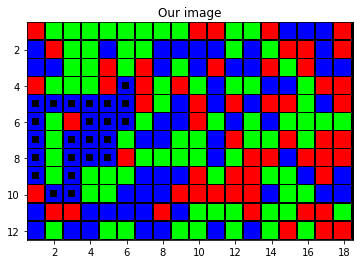

In [38]:
import itertools
possible_i = list(range(1,framed_color_matrix.shape[0]-1))
possible_j = list(range(1,framed_color_matrix.shape[1]-1))
all_possible_ij = list(itertools.product(possible_i,
                                         possible_j)) # all possible combinations of i and j indices

longest_chain = set()                               # Here is where the actual search for the longest
for ij in all_possible_ij:                          # chain is happening
    visited_ij = matrix_bfs(framed_color_matrix,ij)
    if len(visited_ij)>len(longest_chain):
        longest_chain = visited_ij
    for indices in visited_ij:
        all_possible_ij.remove(indices)
        
print("Here are the indices of a longest connected chain of same-colored tiles:\n{}"
      .format(longest_chain))
print("It is {} tiles long".format(len(longest_chain)))

image_copy = np.copy(image)
for ij in longest_chain:
    image_copy[(ij[0]-1)*ppt_y+ppt_y//2-ppt_y//5:(ij[0]-1)*ppt_y+ppt_y//2+ppt_y//5,
               (ij[1]-1)*ppt_x+ppt_x//2-ppt_x//5:(ij[1]-1)*ppt_x+ppt_x//2+ppt_x//5,
               :] = 0

plt.imshow(image_copy, extent=(0.5, tiles_x + .5 , tiles_y + .5, 0.5, ))
plt.title('Our image')
plt.show() # Done!

### That's it!